# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### SOUVIK GHOSH -PGSSP -SMAI
Contact - souvik.ghosh@students.iiit.ac.in

### Imports

In [102]:
!pip install plotly

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import plotly.express as px
# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



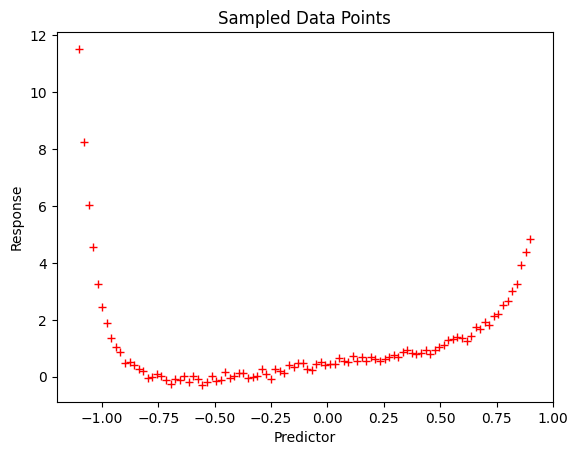

In [28]:
def gen_data():
    coeff = np.random.rand(26)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor, response = gen_data()

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [29]:
# your code here
predictor.shape,response.shape, type(response)

((100,), (100,), numpy.ndarray)

#### Utlity Functions

In [30]:
def plot_result(x,y,y_pred):
  plt.plot(x, y, 'r+',label='real')
  plt.plot(x,y_pred,label='predicted')
  plt.xlabel('Predictor')
  plt.ylabel('Response')
  plt.title('Sampled Data Points')
  plt.legend()
  plt.show()

#### Linear Regression from scratch

In [41]:
class LinearRegression:

    def __init__(self, learning_rate, convergence_tol=1e-6):
        self.learning_rate = learning_rate
        self.convergence_tol = convergence_tol
        self.W = None
        self.b = None

    def initialize_parameters(self, n_features):

        self.W = np.random.randn(n_features) * 0.01
        self.b = 0

    def forward(self, X):

        return np.dot(X, self.W) + self.b

    def compute_cost(self, predictions):

        l = len(predictions)
        cost = np.sum(np.square(predictions - self.y)) / (2 * l)

        return cost

    def backward(self, predictions):

        l = len(predictions)
        self.dW = np.dot(predictions - self.y, self.X) / l
        self.db = np.sum(predictions - self.y) / l

    def fit(self, X, y, iterations, plot_loss=True):

        assert isinstance(X, np.ndarray), "X must be a NumPy array"
        assert isinstance(y, np.ndarray), "y must be a NumPy array"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"
        assert iterations > 0, "Iterations must be greater than 0"

        self.X = X
        self.y = y
        self.initialize_parameters(X.shape[1])
        costs = []

        for i in range(iterations):
            predictions = self.forward(X)
            cost = self.compute_cost(predictions)
            self.backward(predictions)
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db
            costs.append(cost)

            if i % 100 == 0:
                print(f'Iteration: {i}, Cost: {cost}')

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f'Converged after {i} iterations.')
                break

        if plot_loss:
            fig = px.line(y=costs, title="Loss vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Loss")
            )

            fig.show()

    def predict(self, X):
        return self.forward(X)

In [42]:
X_train = np.expand_dims(predictor, axis=-1)
X_train.shape

(100, 1)

In [43]:
lr = LinearRegression(0.01)
lr.fit(X_train, response, 10000)

Iteration: 0, Cost: 2.1182797019805837
Iteration: 100, Cost: 1.5977887720319879
Iteration: 200, Cost: 1.5268438222353495
Iteration: 300, Cost: 1.5159381764878594
Iteration: 400, Cost: 1.513659601806925
Iteration: 500, Cost: 1.5129233103006674
Iteration: 600, Cost: 1.5126026548599223
Iteration: 700, Cost: 1.5124460016259624
Converged after 714 iterations.


In [44]:
lr.W,lr.b

(array([0.13020584]), 1.1078970278967517)

In [45]:
predicted_y = lr.W*predictor + lr.b
predicted_y.shape,response.shape

((100,), (100,))

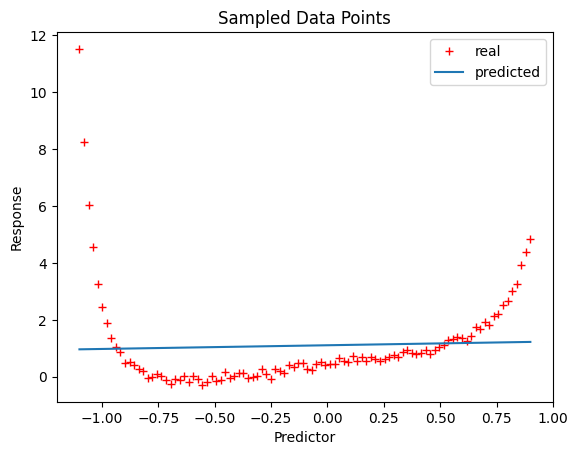

In [46]:
plot_result(predictor,response,predicted_y)

### Part 2 : Polynomial Regression

In [64]:
class PolynomialRegression:

    def __init__(self, learning_rate, convergence_tol=1e-6):
        self.learning_rate = learning_rate
        self.convergence_tol = convergence_tol
        self.W = None
        self.b = None

    def initialize_parameters(self, n_features):

        self.W = np.random.randn(n_features)
        self.W = np.expand_dims(self.W, axis =1)
        self.b = 0

    def forward(self, X):
        #print(self.W.shape)
        return (np.dot(X, self.W) + self.b).flatten()

    def compute_cost(self, predictions):

        m = len(predictions)
        cost = np.sum(np.square(predictions - self.y)) / (2 * m)
        return cost

    def backward(self, predictions):

        m = len(predictions)
        self.dW = np.dot(predictions - self.y, self.X) / m
        self.db = np.sum(predictions - self.y) / m
        self.dW = np.expand_dims(self.dW, axis = 1)
        #print(self.dW.shape, self.db.shape)

    def make_poly(self,degree):
      x1= self.X.copy()
      for i in range(2,degree+1):
        self.X = np.append(self.X,x1 ** i,axis=1)

    def fit(self, X, y, iterations, degree, plot_loss=True):

        assert isinstance(X, np.ndarray), "X must be a NumPy array"
        assert isinstance(y, np.ndarray), "y must be a NumPy array"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"
        assert iterations > 0, "Iterations must be greater than 0"

        self.X = X
        self.y = y
        self.make_poly(degree)
        self.initialize_parameters(self.X.shape[1])
        costs = []

        for i in range(iterations):
            predictions = self.forward(self.X)
            cost = self.compute_cost(predictions)
            self.backward(predictions)

            #print(self.W.shape, (self.learning_rate * self.dW).shape)
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db
            costs.append(cost)
            if i == iterations - 1:
              print(f'Iteration: {i}, Cost: {cost}')

            # if i % 100 == 0:
            #     print(f'Iteration: {i}, Cost: {cost}')

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f'Converged after {i} iterations. Loss  {cost}')
                break

        if plot_loss:
            fig = px.line(y=costs, title="Loss vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Loss")
            )

            fig.show()

    def predict(self, X):

        return self.forward(X)

In [68]:
pr = PolynomialRegression(0.01)

In [65]:
degree = 14
pr.fit(X_train, response, 10000,degree)
x_poly = X_train
for i in range(2,degree+1):
  x_poly = np.append(x_poly,X_train**i,axis = 1)
predicted_y_poly = np.dot(x_poly,pr.W) + pr.b


Converged after 8583 iterations.


In [50]:
x_poly.shape, pr.W.shape

((100, 14), (14, 1))

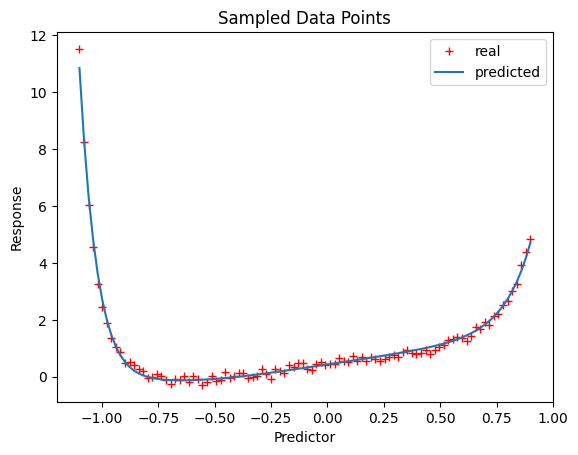

In [51]:
plot_result(predictor,response,predicted_y_poly)

Iteration: 9999, Cost: 0.26723785668809014


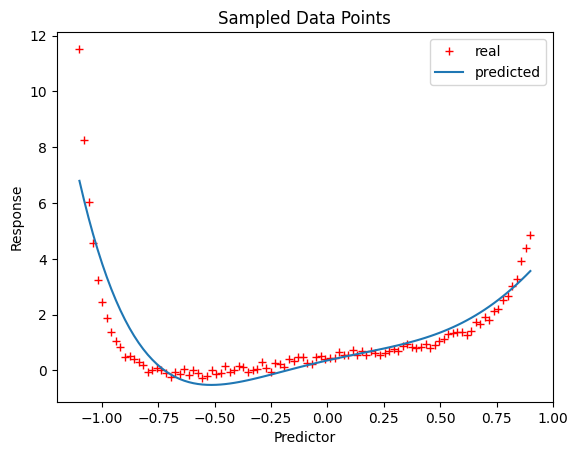

In [52]:
degree = 5
pr.fit(X_train, response, 10000,degree)
x_poly = X_train
for i in range(2,degree+1):
  x_poly = np.append(x_poly,X_train**i,axis = 1)
predicted_y_poly = np.dot(x_poly,pr.W) + pr.b
plot_result(predictor,response,predicted_y_poly)

Here we cnclude that as we increase the degree of polynomial the line fits perfectly on the training set as we observe on polynomial degree of 14 ( MSE = 0.0076. We also test with lower degree polynomials like those of 5 (MSE = 0.01415) and observe that although it follows the path but misses some points.

#### Part 1.1 Regularization

In this section, you will be required to perform the converse of the previous section. After generating data from a lower degree polynomial, you will try to fit a higher degree polynomial to it. This will result in overfitting. You will then use regularization to reduce the overfitting. Try both L1 and L2 regularization and compare the results.

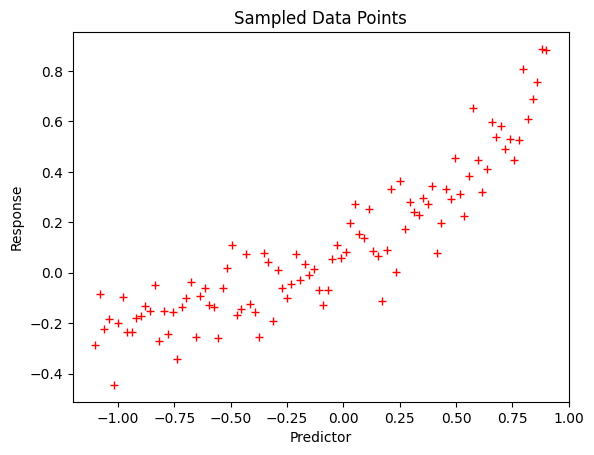

In [53]:
def gen_data_low():
    coeff = np.random.rand(np.random.choice([3, 5, 7]))
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return x, y

predictor_low, response_low = gen_data_low()

plt.plot(predictor_low, response_low, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

##### prediction with polynomial 10

In [69]:
# Keeping the same degree for all 3 experiments
degree = 10

Converged after 4995 iterations. Loss  0.008341527636154592


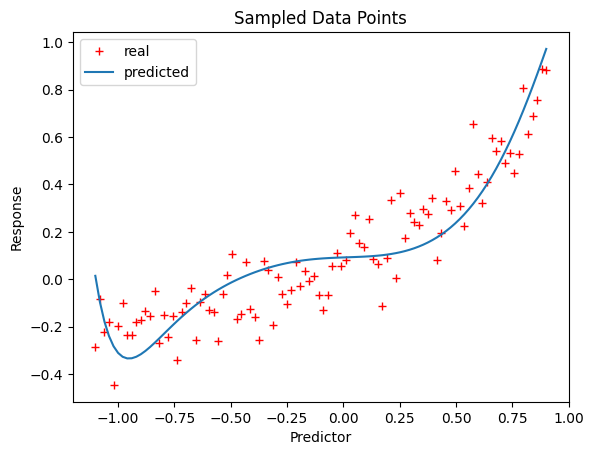

In [70]:
x_train = np.expand_dims(predictor_low, axis=-1)
pr.fit(X_train, response_low, 10000,degree)
x_poly = X_train
for i in range(2,degree+1):
  x_poly = np.append(x_poly,X_train**i,axis = 1)
predicted_y_poly = np.dot(x_poly,pr.W) + pr.b
plot_result(predictor_low,response_low,predicted_y_poly)

#### Applying regularization on the weights

In [71]:
class PolynomialRegressionRegularized:

    def __init__(self, learning_rate, convergence_loss=1e-6,regularization = 'l2', alpha = 0.01):
        self.learning_rate = learning_rate
        self.convergence_loss = convergence_loss
        self.W = None
        self.b = None
        self.regularization = regularization
        self.alpha = alpha

    def initialize_parameters(self, n_features):

        self.W = np.random.randn(n_features)
        self.W = np.expand_dims(self.W, axis =1)
        self.b = 0

    def forward(self, X):
        #print(self.W.shape)
        return (np.dot(X, self.W) + self.b).flatten()

    def compute_cost(self, predictions):

        cost = np.mean(np.square(predictions - self.y))
        return cost

    def backward(self, predictions):

        m = len(predictions)
        if self.regularization == 'l2':
          reg =  2* self.alpha * self.W.flatten()
        else:
          reg = self.alpha * np.sign(self.W.flatten())

        self.dW = np.dot(predictions - self.y, self.X)/m + reg
        self.db = np.sum(predictions - self.y) / m
        self.dW = np.expand_dims(self.dW, axis = 1)


    def make_poly(self,degree):
      x1= self.X.copy()
      for i in range(2,degree+1):
        self.X = np.append(self.X,x1 ** i,axis=1)

    def fit(self, X, y, iterations, degree, plot_loss=True):

        assert isinstance(X, np.ndarray), "X must be a NumPy array"
        assert isinstance(y, np.ndarray), "y must be a NumPy array"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"
        assert iterations > 0, "Iterations must be greater than 0"

        self.X = X
        self.y = y
        self.make_poly(degree)
        self.initialize_parameters(self.X.shape[1])
        costs = []

        for i in range(iterations):
            predictions = self.forward(self.X)
            cost = self.compute_cost(predictions)
            self.backward(predictions)

            #print(self.W.shape, (self.learning_rate * self.dW).shape)
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db
            costs.append(cost)
            if i == iterations - 1:
              print(f'Iteration: {i}, Cost: {cost}')



            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_loss:
                print(f'Converged after {i} iterations. Loss = {cost}')
                break

        if plot_loss:
            fig = px.line(y=costs, title="Loss vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Loss")
            )

            fig.show()

    def predict(self, X):

        return self.forward(X)


Converged after 4182 iterations. Loss = 0.012468048672470849


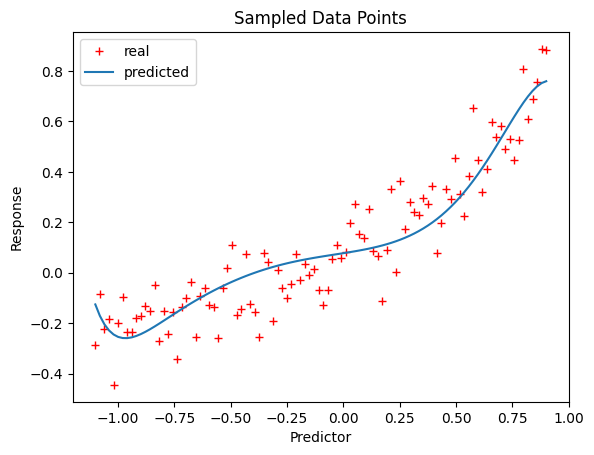

In [60]:
prr_l2 = PolynomialRegressionRegularized(0.01,regularization = 'l2')
prr_l2.fit(X_train, response_low, 10000,degree)
predicted_y_poly_reg = np.dot(x_poly,prr_l2.W) + prr_l2.b
plot_result(predictor_low,response_low,predicted_y_poly_reg)

Converged after 3794 iterations. Loss = 0.013369056385940216


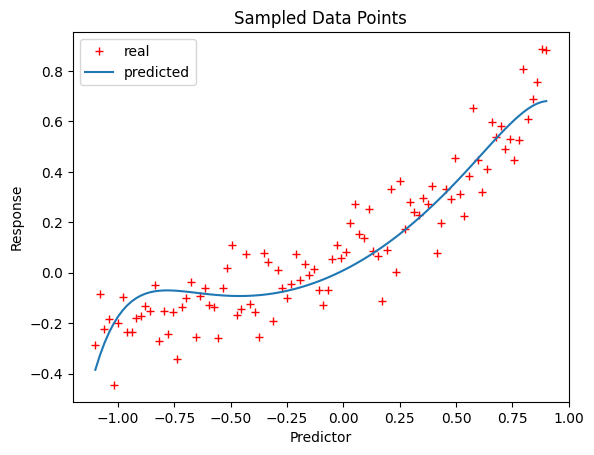

In [101]:
prr_l1 = PolynomialRegressionRegularized(0.01,regularization = 'l1')
prr_l1.fit(X_train, response_low, 10000,degree)
predicted_y_poly_reg = np.dot(x_poly,prr_l1.W) + prr_l1.b
plot_result(predictor_low,response_low,predicted_y_poly_reg)

Through the above plots we see that L2 and L1 avoid overfitting of the polynomial curve. We also note that for our specific setting L2 has a lower loss than L1.

### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

In [72]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [73]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Balance    400 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 22.0 KB


In [74]:
def normalize_column(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

# Normalizing each column of the dataframe
credit1 = credit.apply(normalize_column)

In [75]:
X = credit1.drop(columns='Balance').values
y = credit1['Balance'].values

In [76]:
lr = LinearRegression(0.01)
lr.fit(X, y, 10000)

Iteration: 0, Cost: 0.060591910185613454
Iteration: 100, Cost: 0.021872192602508108
Iteration: 200, Cost: 0.019320057071881953
Iteration: 300, Cost: 0.017917542574192372
Iteration: 400, Cost: 0.01672334770031279
Iteration: 500, Cost: 0.015686807783339692
Iteration: 600, Cost: 0.014784333895499425
Iteration: 700, Cost: 0.01399636961591288
Iteration: 800, Cost: 0.013306291079747274
Iteration: 900, Cost: 0.012699953169319964
Iteration: 1000, Cost: 0.012165316669687933
Iteration: 1100, Cost: 0.011692131991741492
Iteration: 1200, Cost: 0.011271670595325647
Iteration: 1300, Cost: 0.0108964968949144
Iteration: 1400, Cost: 0.010560274530700766
Iteration: 1500, Cost: 0.010257601813838661
Iteration: 1600, Cost: 0.009983871940011208
Iteration: 1700, Cost: 0.009735154231983147
Iteration: 1800, Cost: 0.009508093237353467
Iteration: 1900, Cost: 0.009299822987650667
Iteration: 2000, Cost: 0.009107894132181903
Iteration: 2100, Cost: 0.008930212005665811
Iteration: 2200, Cost: 0.00876498398198739
Itera

In [77]:
lr.W

array([ 0.05331981,  0.43877981,  0.44526122,  0.05713636, -0.06456045,
       -0.0083492 ])

We see that education doesn't play a vital role for balance since the weight assigned to it is too less.

**Interaction Effect between Rating and Age**

In [79]:
credit['ratingxage']=credit['Rating'] * credit['Age']
credit2 = credit.drop(columns=['Rating','Age']).apply(normalize_column)

In [80]:
credit2.head()

,Income,Limit,Cards,Education,Balance,ratingxage
0,0.025737,0.210675,0.125,0.400000,0.166583,0.065673
1,0.542722,0.443406,0.250,0.666667,0.451726,0.389118
2,0.534598,0.476336,0.375,0.400000,0.290145,0.355548
3,0.786079,0.662353,0.250,0.400000,0.482241,0.226338
4,0.258271,0.309542,0.125,0.733333,0.165583,0.223749


In [83]:
X1 = credit2.drop(columns='Balance').values
y1 = credit2['Balance'].values

In [84]:
lr1 = LinearRegression(0.01)
lr1.fit(X1, y1, 10000)

Iteration: 0, Cost: 0.060082854912688555
Iteration: 100, Cost: 0.023443933688313514
Iteration: 200, Cost: 0.020685130205776253
Iteration: 300, Cost: 0.019541096329655665
Iteration: 400, Cost: 0.018585673449608427
Iteration: 500, Cost: 0.017741323822093216
Iteration: 600, Cost: 0.016991391473803356
Iteration: 700, Cost: 0.016323620738565664
Iteration: 800, Cost: 0.015727461142507105
Iteration: 900, Cost: 0.01519375058412569
Iteration: 1000, Cost: 0.014714528569852612
Iteration: 1100, Cost: 0.014282877901626887
Iteration: 1200, Cost: 0.013892787381208374
Iteration: 1300, Cost: 0.013539032602063133
Iteration: 1400, Cost: 0.01321707243944541
Iteration: 1500, Cost: 0.012922959170747927
Iteration: 1600, Cost: 0.012653260430870353
Iteration: 1700, Cost: 0.0124049914438356
Iteration: 1800, Cost: 0.012175556177202132
Iteration: 1900, Cost: 0.011962696244093119
Iteration: 2000, Cost: 0.011764446532454438
Iteration: 2100, Cost: 0.01157909667555491
Iteration: 2200, Cost: 0.011405157594440343
Itera

In [86]:
lr1.W

array([ 0.10527441,  0.57800885,  0.06154353, -0.01031669,  0.2533402 ])

We observe there is a strong interaction effect between rating and age as the weight assigned to the values is quite high

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [87]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


In [89]:
sharks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           84 non-null     int64  
 1   Month          84 non-null     int64  
 2   SharkAttacks   84 non-null     int64  
 3   Temperature    84 non-null     float64
 4   IceCreamSales  84 non-null     int64  
dtypes: float64(1), int64(4)
memory usage: 3.4 KB


In [90]:
sharks.describe()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
count,84.000000,84.000000,84.000000,84.000000,84.000000
mean,2011.000000,6.500000,34.000000,18.730089,88.166667
std,2.012012,3.472786,8.435439,4.032201,13.404579
min,2008.000000,1.000000,14.000000,10.698348,64.000000
25%,2009.000000,3.750000,27.000000,16.078856,76.750000
50%,2011.000000,6.500000,35.000000,18.375564,91.000000
75%,2013.000000,9.250000,41.250000,22.311114,101.000000
max,2014.000000,12.000000,50.000000,25.356139,109.000000


In [88]:
# your code here
# Normalize data
shark1 = sharks.apply(normalize_column)

In [96]:
shark1.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,0.0,0.000000,0.305556,0.081980,0.266667
1,0.0,0.090909,0.388889,0.307117,0.333333
2,0.0,0.181818,0.500000,0.443563,0.600000
3,0.0,0.272727,0.583333,0.532253,0.688889
4,0.0,0.363636,0.666667,0.593654,0.866667


In [93]:
X = shark1.drop(columns=['SharkAttacks']).values
y = shark1['SharkAttacks'].values

In [94]:
lr2 = LinearRegression(0.01)
lr2.fit(X, y, 10000)

Iteration: 0, Cost: 0.17935875093096762
Iteration: 100, Cost: 0.018781380425960056
Iteration: 200, Cost: 0.01577309989149466
Iteration: 300, Cost: 0.014980343538726152
Iteration: 400, Cost: 0.014364248454432396
Iteration: 500, Cost: 0.013868773118250537
Iteration: 600, Cost: 0.013469486516790271
Iteration: 700, Cost: 0.013147184833176177
Iteration: 800, Cost: 0.012886563125240922
Iteration: 900, Cost: 0.012675413588037124
Iteration: 1000, Cost: 0.01250399222223669
Iteration: 1100, Cost: 0.012364515871649445
Iteration: 1200, Cost: 0.012250762648891427
Converged after 1214 iterations.


In [95]:
lr2.W

array([0.00351206, 0.15571141, 0.29644622, 0.23789931])

Now lets remove ice cream data

In [98]:
X = shark1.drop(columns=['SharkAttacks','IceCreamSales']).values
y = shark1['SharkAttacks'].values

In [99]:
lr2 = LinearRegression(0.01)
lr2.fit(X, y, 10000)

Iteration: 0, Cost: 0.1797707854005261
Iteration: 100, Cost: 0.023498243956409377
Iteration: 200, Cost: 0.01885301309360095
Iteration: 300, Cost: 0.0179629459358245
Iteration: 400, Cost: 0.017279828948410642
Iteration: 500, Cost: 0.01669985056292489
Iteration: 600, Cost: 0.016204670355126766
Iteration: 700, Cost: 0.015780733716478396
Iteration: 800, Cost: 0.015416847645413784
Iteration: 900, Cost: 0.015103716504618463
Iteration: 1000, Cost: 0.01483360074603144
Iteration: 1100, Cost: 0.014600040171835815
Iteration: 1200, Cost: 0.014397628549029488
Iteration: 1300, Cost: 0.014221829766139364
Iteration: 1400, Cost: 0.014068827643256314
Iteration: 1500, Cost: 0.013935403033465849
Iteration: 1600, Cost: 0.013818833081300882
Converged after 1666 iterations.


In [100]:
lr2.W

array([-0.00629803,  0.1183627 ,  0.44200783])

We now see that although the loss is nearly same, we find a strong correlation between temperature and shark attacks.